In [198]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

In [199]:
vinyl_smiles = "OC(F)=C(Cl)Br"
monomer = Chem.MolFromSmiles(vinyl_smiles)
water = Chem.MolFromSmiles("O")

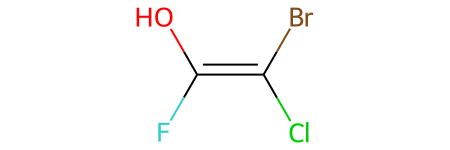

In [200]:
monomer

In [201]:
water = Chem.MolFromSmiles("[I][At]")

### Initiation (vinyl)

In [202]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[C:1]=[C:2].[I]-[At]>>[I]-[C:1]-[C:2]-[At]"
)

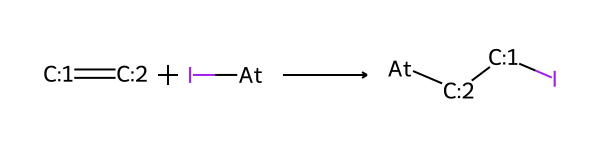

In [203]:
initiation

In [204]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((monomer, water))[0][0]

[16:17:19] reactant 1 has no mapped atoms.


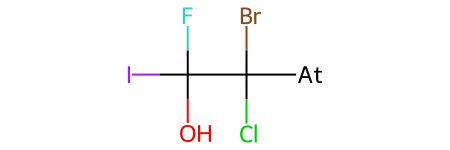

In [205]:
dp1

### Propagation reaction (should work for everything)

In [206]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[I:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)

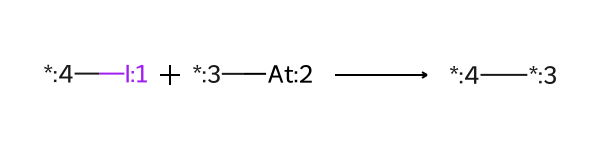

In [207]:
prop

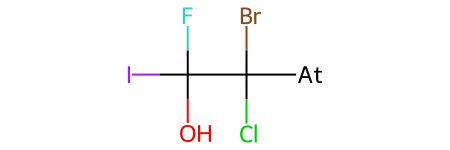

In [208]:
dp1

In [209]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[16:17:19] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


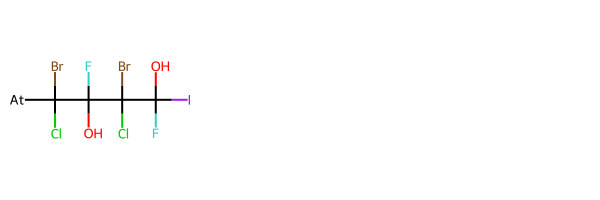

In [210]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=3)

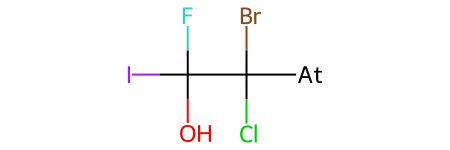

In [211]:
dp1

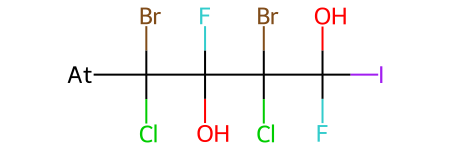

In [212]:
dp2 = products[0]
dp2

In [218]:
dp3 = prop.RunReactants((dp1, dp2))[0][0]

### Replace end groups with CH3s

In [190]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replaceI = rdChemReactions.ReactionFromSmarts(
    "[I:1]>>[C:1]"
)

In [219]:
replaceAt.RunReactantInPlace(dp3)

True

In [220]:
replaceI.RunReactantInPlace(dp3)

True

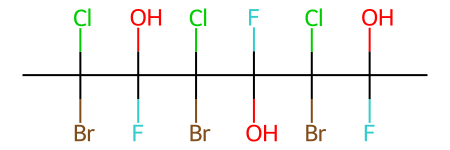

In [221]:
dp3